# TITLE: The Iris Flower Classification Project
## Introduction
The Iris flower dataset is a classic dataset in machine learning and statistics, widely used for classification and pattern recognition tasks. It contains 150 samples of iris flowers from three species: Iris setosa, Iris versicolor, and Iris virginica.

Each sample has four features (numeric measurements):

- Sepal length (cm)

- Sepal width (cm)

- Petal length (cm)

- Petal width (cm)

The goal is to predict the species of an iris flower based on these measurements.
**The business question** is
how can we automatically and accurately classify different species of iris flowers based on measurable flower characteristics, in order to improve efficiency and reduce human error in botanical research, agriculture, and flower supply chain operations?

In [1]:
#importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df=pd.read_csv('Iris.csv')

In [3]:
#getting a preview of the dataset
df.shape
print("The shape of the dataset", df.shape)
df.head()

The shape of the dataset (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:

#statistical description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## DATA CLEANING/PREPROCESSING

In [6]:
#lets drop the id column
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**The dataset has no null values. '-'**

In [8]:
#checking for duplicates
df.duplicated().sum()

3

In [9]:
df=df.drop_duplicates()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#lets check the duplicates now
df.duplicated().sum()

0

In [11]:
#lets encode the species column
#we import the library
from sklearn.preprocessing import LabelEncoder 

In [12]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])




In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# EXPLORATORY DATA ANALYSIS

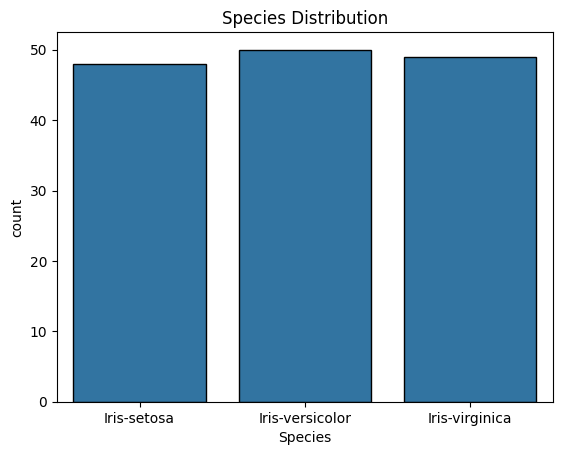

In [14]:
# lets see the counts of the species
sns.countplot(x='Species',edgecolor="black",data=df)
plt.title("Species Distribution")
plt.show()

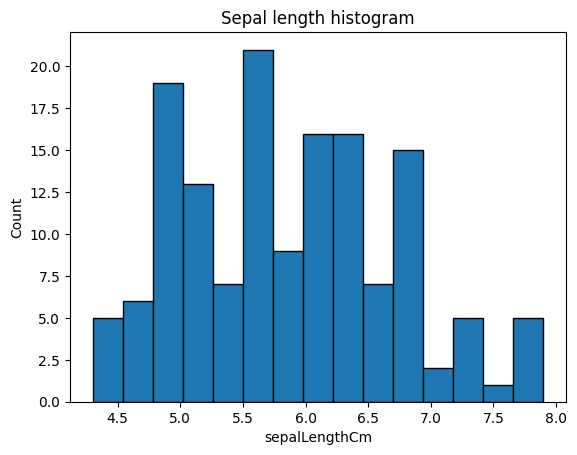

In [15]:
#petalLength distribution
plt.hist(df['SepalLengthCm'],bins=15, edgecolor="black")
plt.title("Sepal length histogram")
plt.xlabel("sepalLengthCm")
plt.ylabel("Count")
plt.show()

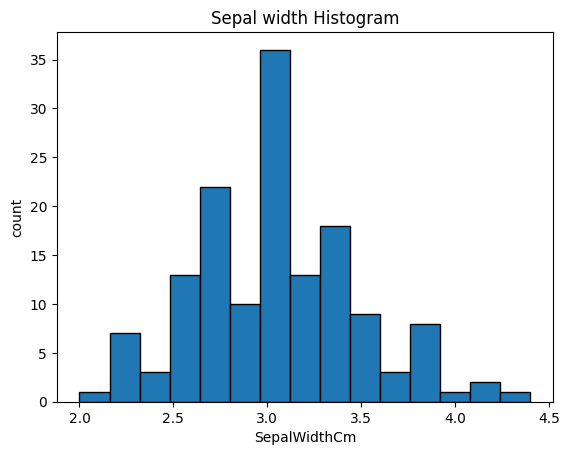

In [16]:
#Sepal width histogram
plt.hist(df['SepalWidthCm'],bins=15, edgecolor="black")
plt.title("Sepal width Histogram")
plt.xlabel("SepalWidthCm")
plt.ylabel("count")
plt.show()

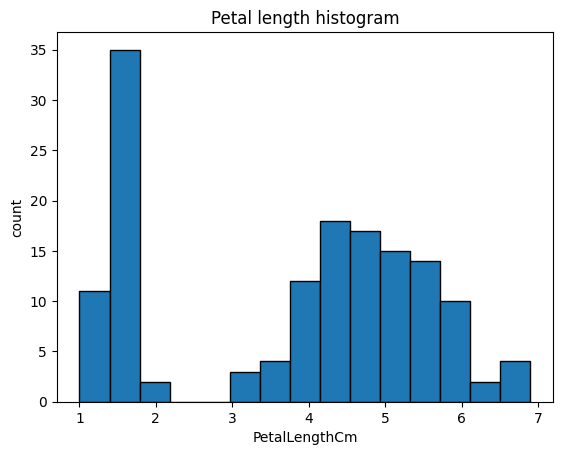

In [17]:
#Petallength histogram
plt.hist(df['PetalLengthCm'],bins=15,edgecolor="black")
plt.title("Petal length histogram")
plt.xlabel("PetalLengthCm")
plt.ylabel("count")
plt.show()

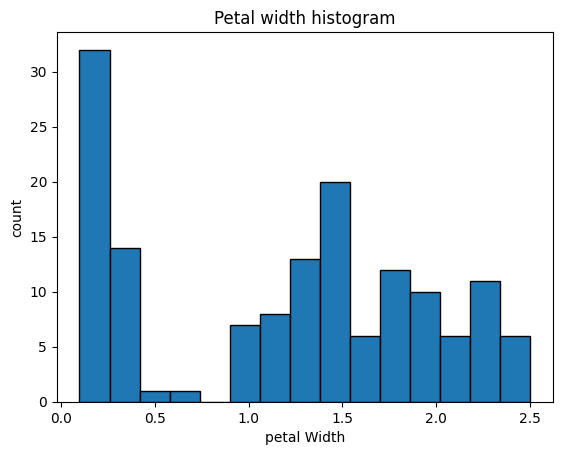

In [18]:
#petal Width histogram
plt.hist(df['PetalWidthCm'],bins=15,edgecolor="black")
plt.title("Petal width histogram")
plt.xlabel("petal Width")
plt.ylabel("count")
plt.show()

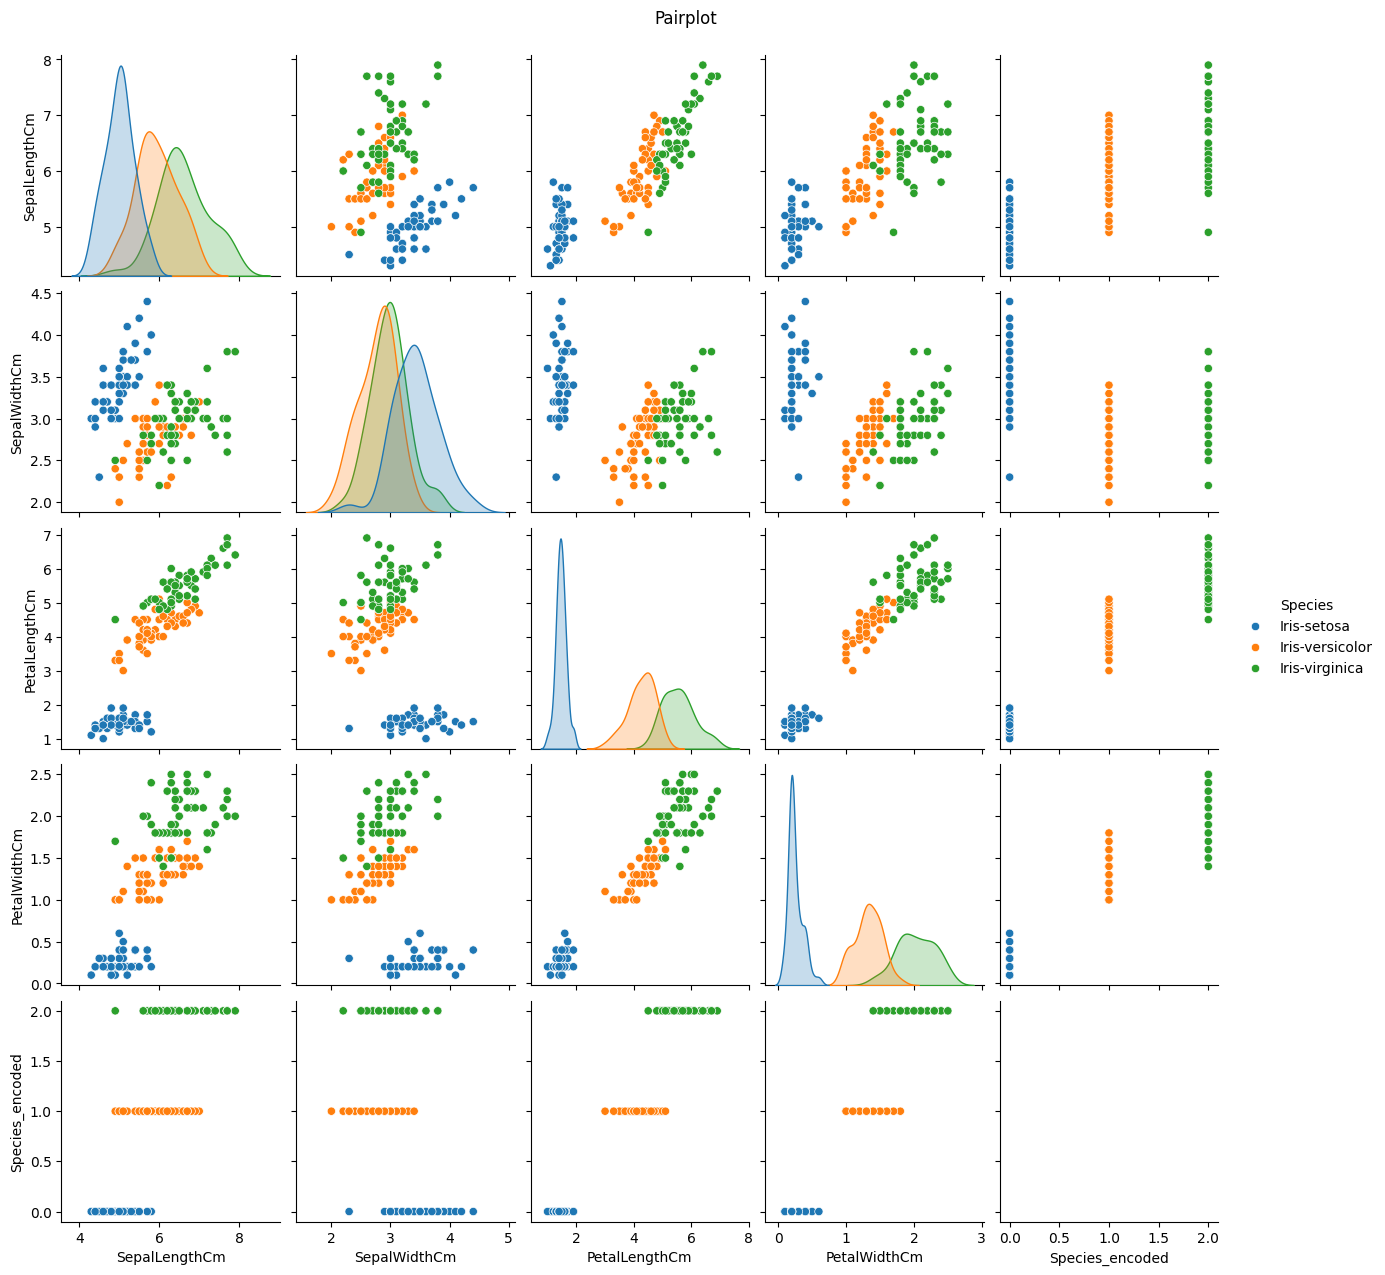

In [20]:
#pairplot
sns.pairplot(df,hue='Species')
plt.suptitle("Pairplot",y=1.02)
plt.show()

In [21]:
#we amke a copy of the data and drop the species column to enable correlation
data=df.copy()

In [22]:
data=data.drop(columns=['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# lets see the Correlation of the measurements
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species_encoded,0.782904,-0.418348,0.948339,0.955693,1.000000


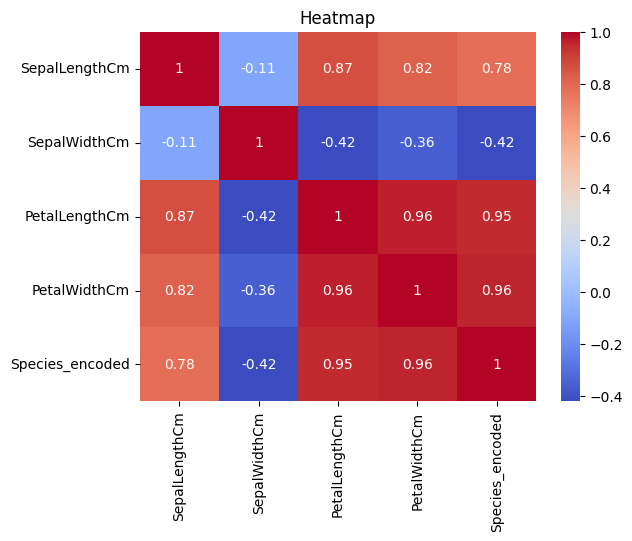

In [24]:
#lets visualize the correlation using a heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap")
plt.show()

## FEATURE  ENGINEERING:

## a. ratios

In [25]:
#we create a new features:Petal ratio and Sepal ratio
data['Petal ratio']=data['PetalLengthCm']/data['PetalWidthCm']
data['Sepal ratio']=data['SepalLengthCm']/data['SepalWidthCm']
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded,Petal ratio,Sepal ratio
0,5.1,3.5,1.4,0.2,0,7.0,1.457143
1,4.9,3.0,1.4,0.2,0,7.0,1.633333
2,4.7,3.2,1.3,0.2,0,6.5,1.468750
3,4.6,3.1,1.5,0.2,0,7.5,1.483871
4,5.0,3.6,1.4,0.2,0,7.0,1.388889


## b. Area(approximation)

In [26]:
#petal area
data['Petal area']=data['PetalLengthCm']*data['PetalWidthCm']
#Sepal area
data['Sepal area']=data['SepalLengthCm']*data['SepalWidthCm']
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded,Petal ratio,Sepal ratio,Petal area,Sepal area
0,5.1,3.5,1.4,0.2,0,7.0,1.457143,0.28,17.85
1,4.9,3.0,1.4,0.2,0,7.0,1.633333,0.28,14.70
2,4.7,3.2,1.3,0.2,0,6.5,1.468750,0.26,15.04
3,4.6,3.1,1.5,0.2,0,7.5,1.483871,0.30,14.26
4,5.0,3.6,1.4,0.2,0,7.0,1.388889,0.28,18.00


## c. shape indicators

In [27]:
#aspect ratio
data['Petal_Sepal_length_Aspect ratio']=data['PetalLengthCm']/data['SepalLengthCm']
#compactness
data['Compactness']=(data['SepalWidthCm']+ data['PetalWidthCm'])/(data['SepalLengthCm']+data['PetalLengthCm'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded,Petal ratio,Sepal ratio,Petal area,Sepal area,Petal_Sepal_length_Aspect ratio,Compactness
0,5.1,3.5,1.4,0.2,0,7.0,1.457143,0.28,17.85,0.274510,0.569231
1,4.9,3.0,1.4,0.2,0,7.0,1.633333,0.28,14.70,0.285714,0.507937
2,4.7,3.2,1.3,0.2,0,6.5,1.468750,0.26,15.04,0.276596,0.566667
3,4.6,3.1,1.5,0.2,0,7.5,1.483871,0.30,14.26,0.326087,0.540984
4,5.0,3.6,1.4,0.2,0,7.0,1.388889,0.28,18.00,0.280000,0.593750


# TRAIN/TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
#splitting the data
X=data.drop('Species_encoded',axis=1)
Y=data['Species_encoded']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
print("Test set size",X_test.shape)
print("Train set size",X_train.shape)

Test set size (45, 10)
Train set size (102, 10)


#  MODELLING

## a. Logistic regression

In [51]:
#importing the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
#initiating the model
model=LogisticRegression(max_iter=1000)
#to increase the iterations to ensure for convergence

In [53]:
#training the model
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [54]:
Y_pred=model.predict(X_test)

In [55]:
#evaluation
print("accuracy:", accuracy_score(Y_test,Y_pred)*100)
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred))

accuracy: 93.33333333333333

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## b. Decision tree

In [61]:
#importging the model
from sklearn.tree import DecisionTreeClassifier


In [74]:
#lets initiate the model
clf=DecisionTreeClassifier(random_state=42)

In [75]:
#training the model
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
#prediction
Y_pred_tree=clf.predict(X_test)

In [78]:
#evaluating the model
print("Accuracy:",accuracy_score(Y_test,Y_pred_tree)*100)
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred_tree))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred_tree))

Accuracy: 88.88888888888889

Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.81      0.87      0.84        15
           2       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



## c. Random Forest

In [82]:
#importing the model
from sklearn.ensemble import RandomForestClassifier

In [83]:
#initializing the odel
model_rf=RandomForestClassifier(random_state=42)

In [84]:
#model training
model_rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [85]:
#prediction
Y_pred_rf=model_rf.predict(X_test)

In [88]:
#model evaluation
print("Accuracy:",accuracy_score(Y_test,Y_pred_rf)*100)
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred_rf))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred_rf))

Accuracy: 91.11111111111111

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## d. Gradient Boosting

In [90]:
#importing the model
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
#initializing the model
model_gbc=GradientBoostingClassifier(random_state=42)

In [95]:
#model training
model_gbc.fit(X_train,Y_train)


GradientBoostingClassifier(random_state=42)

In [102]:
#prediction
Y_pred_gbc=model_gbc.predict(X_test)

In [105]:
#evaluation
print("Acccuracy:",accuracy_score(Y_test,Y_pred_gbc)*100)
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred_gbc))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred_gbc))

Acccuracy: 88.88888888888889

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



## e. Support Vector Machine(SVM)

In [120]:
#importing the model
from sklearn.svm import SVC

In [121]:
#initialization
svm_clf=SVC(random_state=42)

In [122]:
#model training
svm_clf.fit(X_train,Y_train)

SVC(random_state=42)

In [123]:
#prediction
Y_pred_svm=svm_clf.predict(X_test)

In [153]:
#evaluation
print("Accuracy:",accuracy_score(Y_test,Y_pred_svm)*100)
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred_svm))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred_svm))

Accuracy: 91.11111111111111

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



# HYPERPARAMETER TUNING

In [146]:
#gradientboosting has the highest odd of improvement upon tuning
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [147]:
#defining the parameter grid
param_grid= {'n_estimators':[100,200,300],
           'learning_rate':[0.01,0.05,.01],
           'max_depth':[2,3,4]}

In [148]:
#setting GridSearchCv up
grid_search=GridSearchCV(estimator=model_gbc,param_grid=param_grid,
                        cv=5,scoring='accuracy',
                        n_jobs=-1,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.01],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [149]:
#checking the best parameters
print("Best Parameters",grid_search.best_params_)
print("Best CV score:", (grid_search.best_score_)*100)


Best Parameters {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best CV score: 97.09523809523809


In [152]:
#evaluation on the test set
best_model_gbc=grid_search.best_estimator_
Y_pred_model_gbc=best_model_gbc.predict(X_test)
print("test Accuracy:",accuracy_score(Y_test,Y_pred_model_gbc))

test Accuracy: 0.8888888888888888


**LOGISTIC REGRESSION STANDS TO BE STILL THE BEST MODEL FOR OUR PROJECT**

In [154]:
# Model names and their test accuracies 
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting"]
accuracies = [0.93, 0.88, 0.91, 0.91, 0.88] 


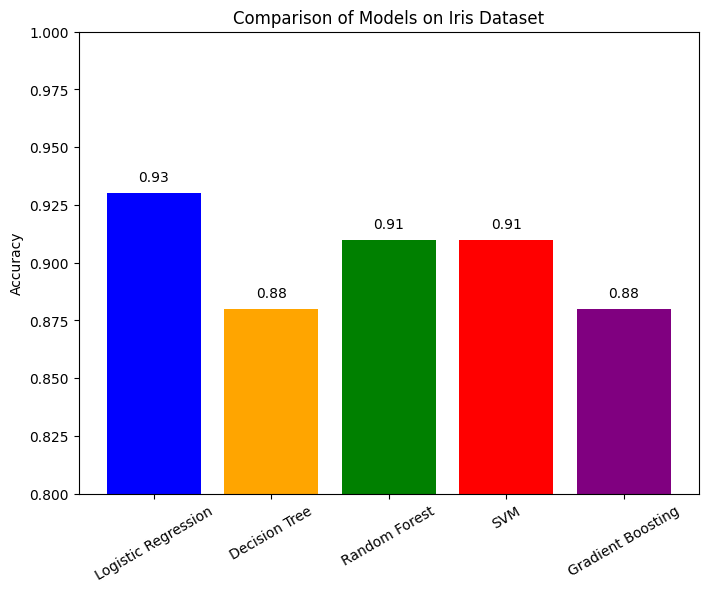

In [156]:
# Create bar chart
plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['blue','orange','green','red','purple'])
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy")
plt.title("Comparison of Models on Iris Dataset")
plt.xticks(rotation=30)
# Show values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.005, f"{acc:.2f}", ha='center')

plt.show()



## LOGISTIC REGRESSION IS OUR BEST PERFROMING MODEL

# INSIGHTS
**The following feature had high positive correlations**

**That is** an increase in one measurement meant an corresponding increase in the other.
- `PetalLengthCm` and `PetalWidthCm`
- `PetaLengthCm` and `SepalLengthCm`
- `PetalwidthCm` and `SepalLengthCm`
  
**The various measurements were as follows**
     **measurement**       **range**
  - `SepalLengthCm`           (**0.0 to 8.0**)
  - `SepalWidthCm`            (**2.0 to 4.5**)
  - `PetalLengthCm`           (**1.0 to 7.0**)
  - `PetalWidthCm`            (**0.0 to 2.5**)

  - ** This is how the various models performed**
| Model                | Accuracy | Precision | Recall | F1-score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.93     | 0.93      | 0.93   | 0.93     |
| Decision Tree         | 0.88     | 0.88      | 0.88   | 0.88     |
| Random Forest         | 0.91     | 0.91      | 0.91   | 0.91     |
| Support Vector Machine| 0.91     | 0.91      | 0.91   | 0.91     |
| Gradient Boosting     | 0.88     | 0.88      | 0.88   | 0.88     
    
    **Logistic regression performed best at 93.33%**

   -  This suggests that the Iris dataset is mostly linearly separable, making Logistic Regression a simple yet highly effective choice.

    

# CONCLUSION
- We successfully trained and evaluated multiple machine learning models to predict the species of Iris flowers based on their characteristic measurements.  
- Among the models tested, **Logistic Regression performed best with an accuracy of 93.3%**, highlighting that the Iris dataset is largely linearly separabl
- **Thus our goal was achieved**
- This project demonstrates how classical machine learning techniques can effectively solve classification problems.  
    ed**

# NEXT STEPS
- Model deployment on streamlit(we deploy the best 3 performing)

 | Model                | Accuracy | Precision | Recall | F1-score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.93     | 0.93      | 0.93   | 0.93     |
| Random Forest         | 0.91     | 0.91      | 0.91   | 0.91     |
| Support Vector Machine| 0.91     | 0.91      | 0.91   | 0.91     |

In [157]:
#we save the models for deployment on streamlit
#we impoort pickle
#logistic regression
import pickle
with open("iris_model.pkl","wb") as f:
    pickle.dump(model,f)
    print("model saved as Iris_model.pkl")

model saved as Iris_model.pkl


In [159]:
#Random forest
with open("Iris_model_rf.pkl","wb") as f:
    pickle.dump(model_rf,f)
    print("model saved as Iris_model_rf.pkl")

model saved as Iris_model_rf.pkl


In [161]:
#Support Vector machine(SVM)
with open("Iris_svm_clf.pkl","wb") as f:
    pickle.dump(svm_clf,f)
    print("model saved as Iris_svm_clf.pkl")

model saved as Iris_svm_clf.pkl
